<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(1_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n250.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,52.049210,13.881656,75.930866,62.323544,13.607323
1,0.0,1.0,58.668493,18.793759,87.462252,68.679151,18.783101
2,0.0,2.0,85.025668,14.037830,109.063498,93.986401,15.077097
3,0.0,3.0,24.164720,22.307599,56.472319,35.549818,20.922501
4,0.0,4.0,46.209695,15.068607,71.278302,56.716642,14.561659
...,...,...,...,...,...,...,...
119995,999.0,115.0,84.774312,-44.067195,50.707117,96.705475,-45.998359
119996,999.0,116.0,95.013140,4.785804,109.798944,106.887507,2.911437
119997,999.0,117.0,52.111056,31.833332,93.944388,64.223409,29.720978
119998,999.0,118.0,97.565848,-36.705753,70.860095,109.426055,-38.565960


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,52.049210,13.881656,75.930866,62.323544,13.607323
1,0.0,1.0,58.668493,18.793759,87.462252,68.679151,18.783101
2,0.0,2.0,85.025668,14.037830,109.063498,93.986401,15.077097
3,0.0,3.0,24.164720,22.307599,56.472319,35.549818,20.922501
4,0.0,4.0,46.209695,15.068607,71.278302,56.716642,14.561659
...,...,...,...,...,...,...,...
119995,999.0,115.0,84.774312,-44.067195,50.707117,96.705475,-45.998359
119996,999.0,116.0,95.013140,4.785804,109.798944,106.887507,2.911437
119997,999.0,117.0,52.111056,31.833332,93.944388,64.223409,29.720978
119998,999.0,118.0,97.565848,-36.705753,70.860095,109.426055,-38.565960


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    52.049210  13.881656   75.930866   62.323544  13.607323
      1.0    58.668493  18.793759   87.462252   68.679151  18.783101
      2.0    85.025668  14.037830  109.063498   93.986401  15.077097
      3.0    24.164720  22.307599   56.472319   35.549818  20.922501
      4.0    46.209695  15.068607   71.278302   56.716642  14.561659
...                ...        ...         ...         ...        ...
999.0 115.0  84.774312 -44.067195   50.707117   96.705475 -45.998359
      116.0  95.013140   4.785804  109.798944  106.887507   2.911437
      117.0  52.111056  31.833332   93.944388   64.223409  29.720978
      118.0  97.565848 -36.705753   70.860095  109.426055 -38.565960
      119.0  54.475620  18.826328   83.301947   66.574856  16.727091

[120000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    52.049210  13.881656   75.930866   62.323544  13.607323
      1.0    58.668493  18.793759   87.462252   68.679151  18.783101
      2.0    85.025668  14.037830  109.063498   93.986401  15.077097
      3.0    24.164720  22.307599   56.472319   35.549818  20.922501
      4.0    46.209695  15.068607   71.278302   56.716642  14.561659
...                ...        ...         ...         ...        ...
999.0 115.0  84.774312 -44.067195   50.707117   96.705475 -45.998359
      116.0  95.013140   4.785804  109.798944  106.887507   2.911437
      117.0  52.111056  31.833332   93.944388   64.223409  29.720978
      118.0  97.565848 -36.705753   70.860095  109.426055 -38.565960
      119.0  54.475620  18.826328   83.301947   66.574856  16.727091

[120000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,52.049210,13.881656,75.930866,62.323544,13.607323
1,0.0,1.0,58.668493,18.793759,87.462252,68.679151,18.783101
2,0.0,2.0,85.025668,14.037830,109.063498,93.986401,15.077097
3,0.0,3.0,24.164720,22.307599,56.472319,35.549818,20.922501
4,0.0,4.0,46.209695,15.068607,71.278302,56.716642,14.561659
...,...,...,...,...,...,...,...
119995,999.0,115.0,84.774312,-44.067195,50.707117,96.705475,-45.998359
119996,999.0,116.0,95.013140,4.785804,109.798944,106.887507,2.911437
119997,999.0,117.0,52.111056,31.833332,93.944388,64.223409,29.720978
119998,999.0,118.0,97.565848,-36.705753,70.860095,109.426055,-38.565960


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    52.049210  13.881656   75.930866   62.323544  13.607323
      1.0    58.668493  18.793759   87.462252   68.679151  18.783101
      2.0    85.025668  14.037830  109.063498   93.986401  15.077097
      3.0    24.164720  22.307599   56.472319   35.549818  20.922501
      4.0    46.209695  15.068607   71.278302   56.716642  14.561659
...                ...        ...         ...         ...        ...
999.0 115.0  84.774312 -44.067195   50.707117   96.705475 -45.998359
      116.0  95.013140   4.785804  109.798944  106.887507   2.911437
      117.0  52.111056  31.833332   93.944388   64.223409  29.720978
      118.0  97.565848 -36.705753   70.860095  109.426055 -38.565960
      119.0  54.475620  18.826328   83.301947   66.574856  16.727091

[120000 rows x 5 columns]

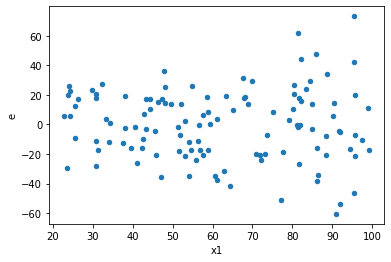

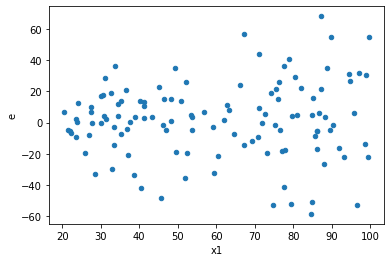

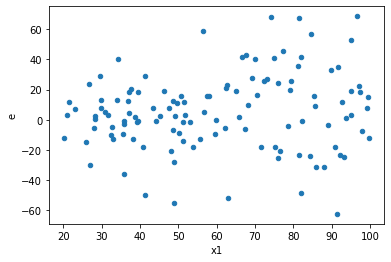

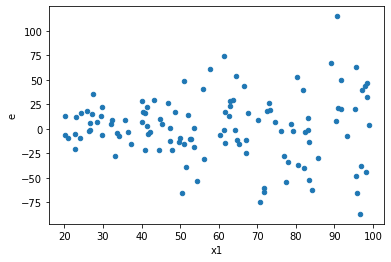

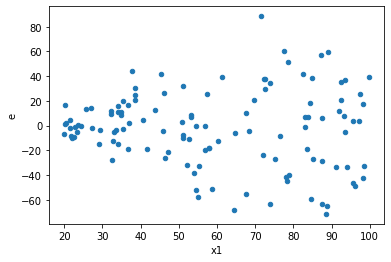

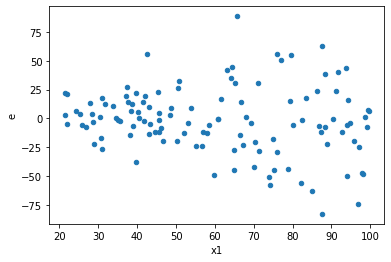

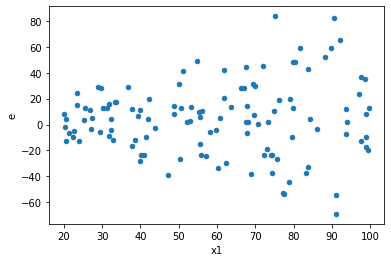

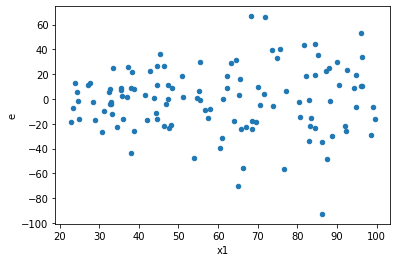

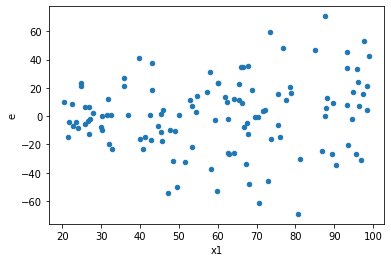

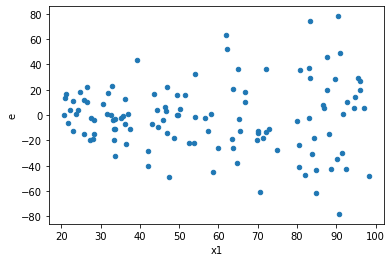

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,47.0,47.0,15205.362755227396,40385.508579713234,323.5183564941999,859.2661399938986,2.6560042815045137,0.0010827964720852012,0.9994586017639574,0.0005413982360426006,Reject001=0 : Heteroscedasticity
1.0,47.0,47.0,14355.4905365154,41533.511588576934,305.4359688620298,883.6917359271688,2.8932143755680135,0.00039624517252945246,0.9998018774137353,0.00019812258626472623,Reject001=0 : Heteroscedasticity
2.0,47.0,47.0,16483.825821608174,43888.289861565354,350.7196983320888,933.7934013099011,2.6625062856484116,0.0010530274568638642,0.9994734862715681,0.0005265137284319321,Reject001=0 : Heteroscedasticity
3.0,47.0,47.0,17165.557882847068,84976.81484927627,365.22463580525675,1808.0173372186441,4.9504254641319045,1.9934949357924836e-07,0.9999999003252532,9.967474678962418e-08,Reject001=0 : Heteroscedasticity
4.0,47.0,47.0,11798.979165489352,72784.48225536084,251.04210990402876,1548.6060054332092,6.168710126063026,5.12912023964418e-09,0.9999999974354399,2.56456011982209e-09,Reject001=0 : Heteroscedasticity
5.0,47.0,47.0,12076.665553345183,59811.47744944691,256.9503309222379,1272.5846265839768,4.952648327077287,1.9792370897775413e-07,0.9999999010381455,9.896185448887707e-08,Reject001=0 : Heteroscedasticity
6.0,47.0,47.0,13652.916974124993,65661.77231623208,290.4875951941488,1397.0589854517464,4.80935850124001,3.156596197761985e-07,0.9999998421701901,1.5782980988809925e-07,Reject001=0 : Heteroscedasticity
7.0,47.0,47.0,13535.640874654546,48157.87423591601,287.9923590352031,1024.635622040766,3.5578569704882987,2.7320522998586227e-05,0.9999863397385007,1.3660261499293114e-05,Reject001=0 : Heteroscedasticity
8.0,47.0,47.0,15505.791709231937,43217.41304241175,329.91046189855183,919.5194264342924,2.787178742810062,0.0006191419307788326,0.9996904290346106,0.0003095709653894163,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,47.0,15205.362755227396,40385.508579713234,323.5183564941999,859.2661399938986,2.6560042815045137,0.0010827964720852012,Reject001=0 : Heteroscedasticity
1.0,47.0,47.0,14355.4905365154,41533.511588576934,305.4359688620298,883.6917359271688,2.8932143755680135,0.00039624517252945246,Reject001=0 : Heteroscedasticity
2.0,47.0,47.0,16483.825821608174,43888.289861565354,350.7196983320888,933.7934013099011,2.6625062856484116,0.0010530274568638642,Reject001=0 : Heteroscedasticity
3.0,47.0,47.0,17165.557882847068,84976.81484927627,365.22463580525675,1808.0173372186441,4.9504254641319045,1.9934949357924836e-07,Reject001=0 : Heteroscedasticity
4.0,47.0,47.0,11798.979165489352,72784.48225536084,251.04210990402876,1548.6060054332092,6.168710126063026,5.12912023964418e-09,Reject001=0 : Heteroscedasticity
5.0,47.0,47.0,12076.665553345183,59811.47744944691,256.9503309222379,1272.5846265839768,4.952648327077287,1.9792370897775413e-07,Reject001=0 : Heteroscedasticity
6.0,47.0,47.0,13652.916974124993,65661.77231623208,290.4875951941488,1397.0589854517464,4.80935850124001,3.156596197761985e-07,Reject001=0 : Heteroscedasticity
7.0,47.0,47.0,13535.640874654546,48157.87423591601,287.9923590352031,1024.635622040766,3.5578569704882987,2.7320522998586227e-05,Reject001=0 : Heteroscedasticity
8.0,47.0,47.0,15505.791709231937,43217.41304241175,329.91046189855183,919.5194264342924,2.787178742810062,0.0006191419307788326,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    965
Reject001=1 : Homoscedasticity       35
Name: Result_test, dtype: int64